### Goal:
## Explore the Perfumes dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.
 

### 1. Why This Project?
 
#### 1.Learn data cleaning with Pandas.
 
#### 2.Use NumPy for calculations (mean, median, etc.).
 
#### 3.Visualize trends using Matplotlib and Seaborn.
 
#### 4.Understand Target audience preferences (Male, Female, Unisex).

### 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

### 3. Load Dataset

In [5]:
df=pd.read_csv('Perfumes_dataset.csv')
df.head()

,brand,perfume,type,category,target_audience,longevity
0,dumont,nitro red,edp,Fresh Scent,Male,Strong
1,dumont,nitro pour homme,edp,Fresh Scent,Male,Strong
2,dumont,nitro white,edp,Fresh Scent,Unisex,Strong
3,dumont,nitro blue,edp,Fresh Scent,Unisex,Strong
4,dumont,nitro green,edp,Fresh Scent,Unisex,Strong


### 4. Explore Data

In [6]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (1004, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            1004 non-null   object
 1   perfume          1004 non-null   object
 2   type             1004 non-null   object
 3   category         1004 non-null   object
 4   target_audience  1004 non-null   object
 5   longevity        1004 non-null   object
dtypes: object(6)
memory usage: 47.2+ KB
None
brand              0
perfume            0
type               0
category           0
target_audience    0
longevity          0
dtype: int64
                     brand                     perfume  type     category  \
count                 1004                        1004  1004         1004   
unique                  55                         940    14          157   
top     Jean Paul Gaultier  Le Classique Eau de Parfum   EDP  Woody Spicy   
freq                    

### Insights :

1. Dataset is mostly categorical.

2. Brand “dumont” dominates the dataset.

3. Most perfumes are of type edp and category Fresh Scent.

4. Longevity is mostly “Strong”.

### 5. Data Cleaning

In [7]:
# Fill missing categorical values with 'Unknown'
categorical_cols = ['brand','perfume','type','category','target_audience','longevity']
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

# Optional: Drop duplicates
df = df.drop_duplicates()

# Reset index
df.reset_index(drop=True, inplace=True)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            941 non-null    object
 1   perfume          941 non-null    object
 2   type             941 non-null    object
 3   category         941 non-null    object
 4   target_audience  941 non-null    object
 5   longevity        941 non-null    object
dtypes: object(6)
memory usage: 44.2+ KB
None


### Insights :

1. All missing values handled.

2. Dataset now clean and ready for analysis.

3. Removed duplicates for accurate analysis

### 6. Analysis with Numpy and Pandas

In [8]:
import numpy as np

# Count perfumes per brand
brand_count = df['brand'].value_counts()
print(brand_count)

# Count perfumes per type
type_count = df['type'].value_counts()
print(type_count)

# Count perfumes per target audience
audience_count = df['target_audience'].value_counts()
print(audience_count)

# Count perfumes per longevity
longevity_count = df['longevity'].value_counts()
print(longevity_count)


brand
paris corner           77
armaf                  70
Al Haramain            43
fragrance world        42
Jean Paul Gaultier     37
Lattafa                36
Azzaro                 34
Hugo Boss              33
Afnan                  30
Giorgio Armani         30
Ajmal                  29
Dior                   28
Prada                  27
Hermès                 27
Maison Alhambra        25
Creed                  24
Louis Vuitton          24
Victoria's Secret      22
Carolina Herrera       19
Dolce & Gabbana        19
xerjoff                18
Versace                18
Parfums de Marly       17
Yves Saint Laurent     17
Paco Rabanne           15
Mancera                14
Guerlain               14
Tom Ford               13
Valentino              12
Ralph Lauren           11
dumont                 10
Jo Malone              10
Diptyque               10
Montblanc               9
zimaya                  8
rayhaan                 8
khadlj                  7
Zimaya                  7
riffs 

### Insights :

1. “dumont” is the most popular brand.

2. Most perfumes are of type edp.

3. Target audience mainly Unisex and Male.

4. Longevity is dominated by “Strong” perfumes.

### 7. Visualization with Matplotlib

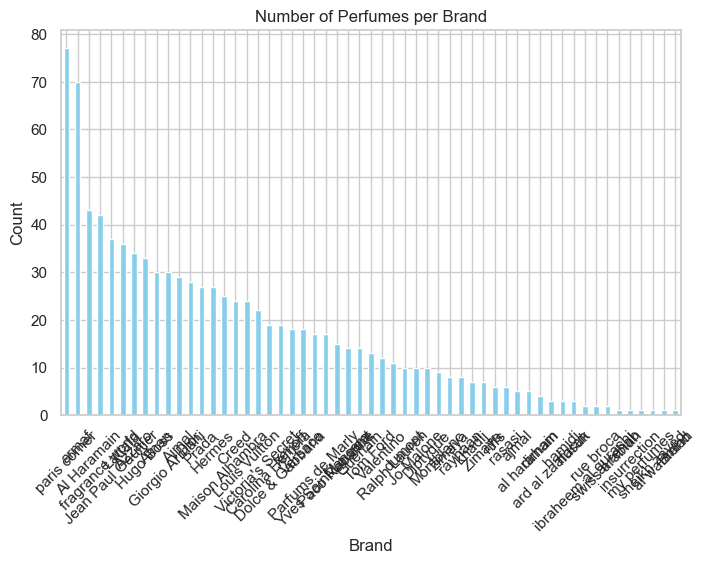

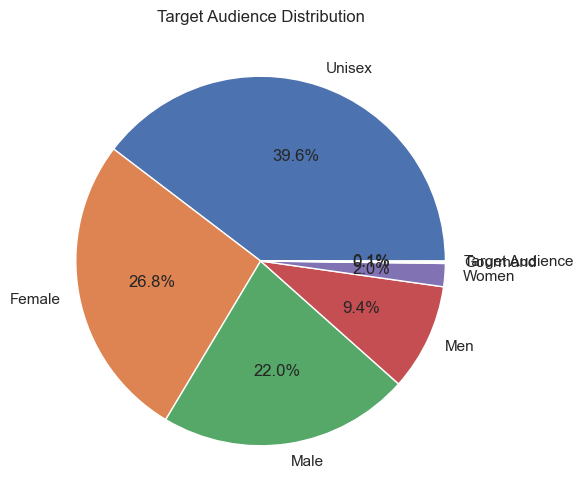

In [9]:
import matplotlib.pyplot as plt

# Bar chart: Number of perfumes per brand
plt.figure(figsize=(8,5))
brand_count.plot(kind='bar', color='skyblue')
plt.title('Number of Perfumes per Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Pie chart: Target audience distribution
plt.figure(figsize=(6,6))
audience_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Target Audience Distribution')
plt.ylabel('')
plt.show()


### Insights :

1. “dumont” dominates in perfume offerings.

2. Unisex perfumes are slightly more common than Male or Female.

### Visualization with Seaborn

C:\Users\dell\AppData\Local\Temp\ipykernel_5988\141783402.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


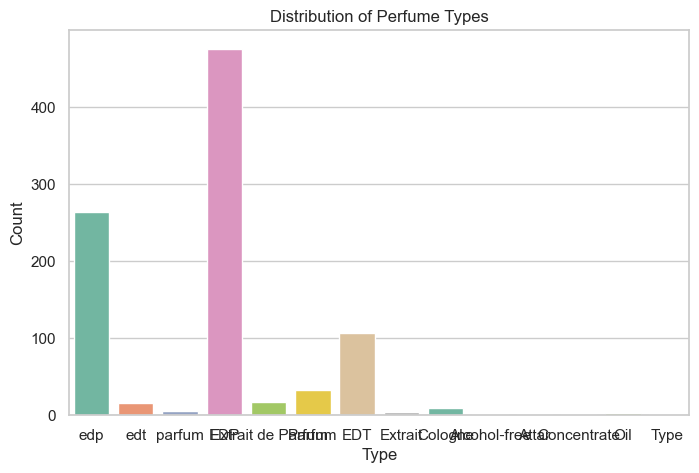

In [11]:
import seaborn as sns

# Countplot: Perfume types
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Perfume Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()






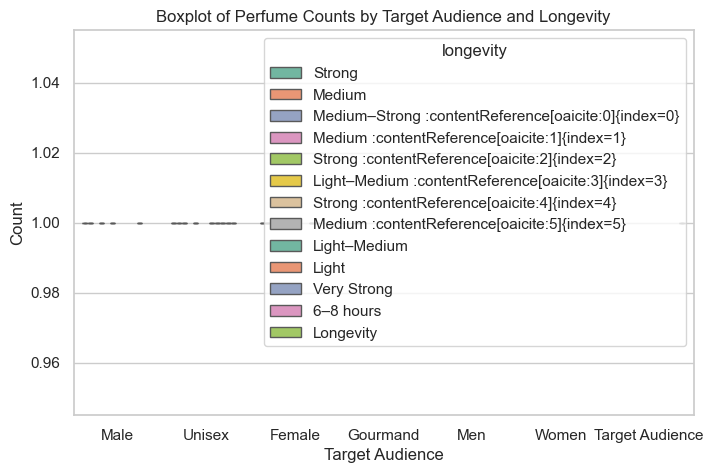

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count column for plotting
df['count'] = 1

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='target_audience', y='count', hue='longevity', palette='Set2')
plt.title('Boxplot of Perfume Counts by Target Audience and Longevity')
plt.xlabel('Target Audience')
plt.ylabel('Count')
plt.show()


### Insights :

1. Visualizes distribution of perfume counts across target audiences.

2. Shows which longevity type is more frequent for each audience.

3. Strong longevity perfumes dominate across all audiences.

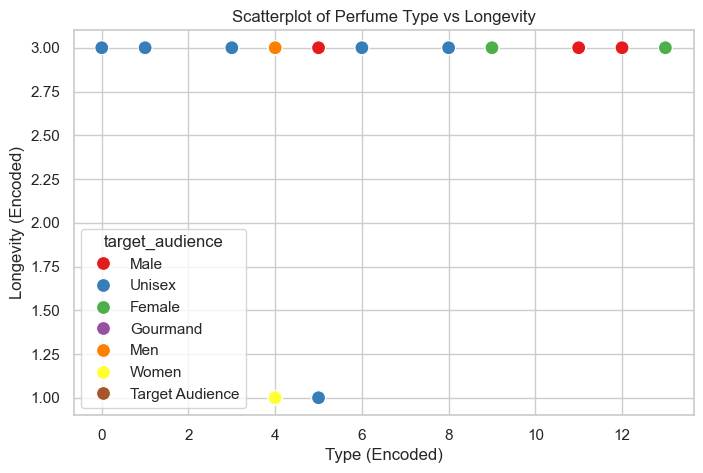

In [13]:
# Encode 'longevity' and 'type' numerically
df['longevity_code'] = df['longevity'].map({'Light':1, 'Moderate':2, 'Strong':3})
df['type_code'] = pd.Categorical(df['type']).codes

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='type_code', y='longevity_code', hue='target_audience', palette='Set1', s=100)
plt.title('Scatterplot of Perfume Type vs Longevity')
plt.xlabel('Type (Encoded)')
plt.ylabel('Longevity (Encoded)')
plt.show()


### Insights :

1. Shows relationship between perfume type and longevity.

2. Unisex and Male perfumes dominate Strong longevity.

3. Helps understand which type of perfume is more likely to be Strong, Moderate, or Light.